In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [29]:
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings 
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
URL='C:\\Users\\C2003977\\Downloads\\credit_risk_dataset.csv'
data=pd.read_csv(URL)

In [4]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
credit_risk=data.dropna()

In [6]:
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
credit_risk.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
class_counts = data['loan_status'].value_counts()

print(class_counts)

0    25473
1     7108
Name: loan_status, dtype: int64


the feature loan_status which is the target variable is not balance, so will apply statifiedkfold method when selecting my testing and training data

In [9]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
credit_risk["person_home_ownership"] = ord_enc.fit_transform(credit_risk[["person_home_ownership"]])

credit_risk["loan_intent"] = ord_enc.fit_transform(credit_risk[["loan_intent"]])
credit_risk["loan_grade"] = ord_enc.fit_transform(credit_risk[["loan_grade"]])
credit_risk["cb_person_default_on_file"] = ord_enc.fit_transform(credit_risk[["cb_person_default_on_file"]])


In [10]:
credit_risk.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


<AxesSubplot:>

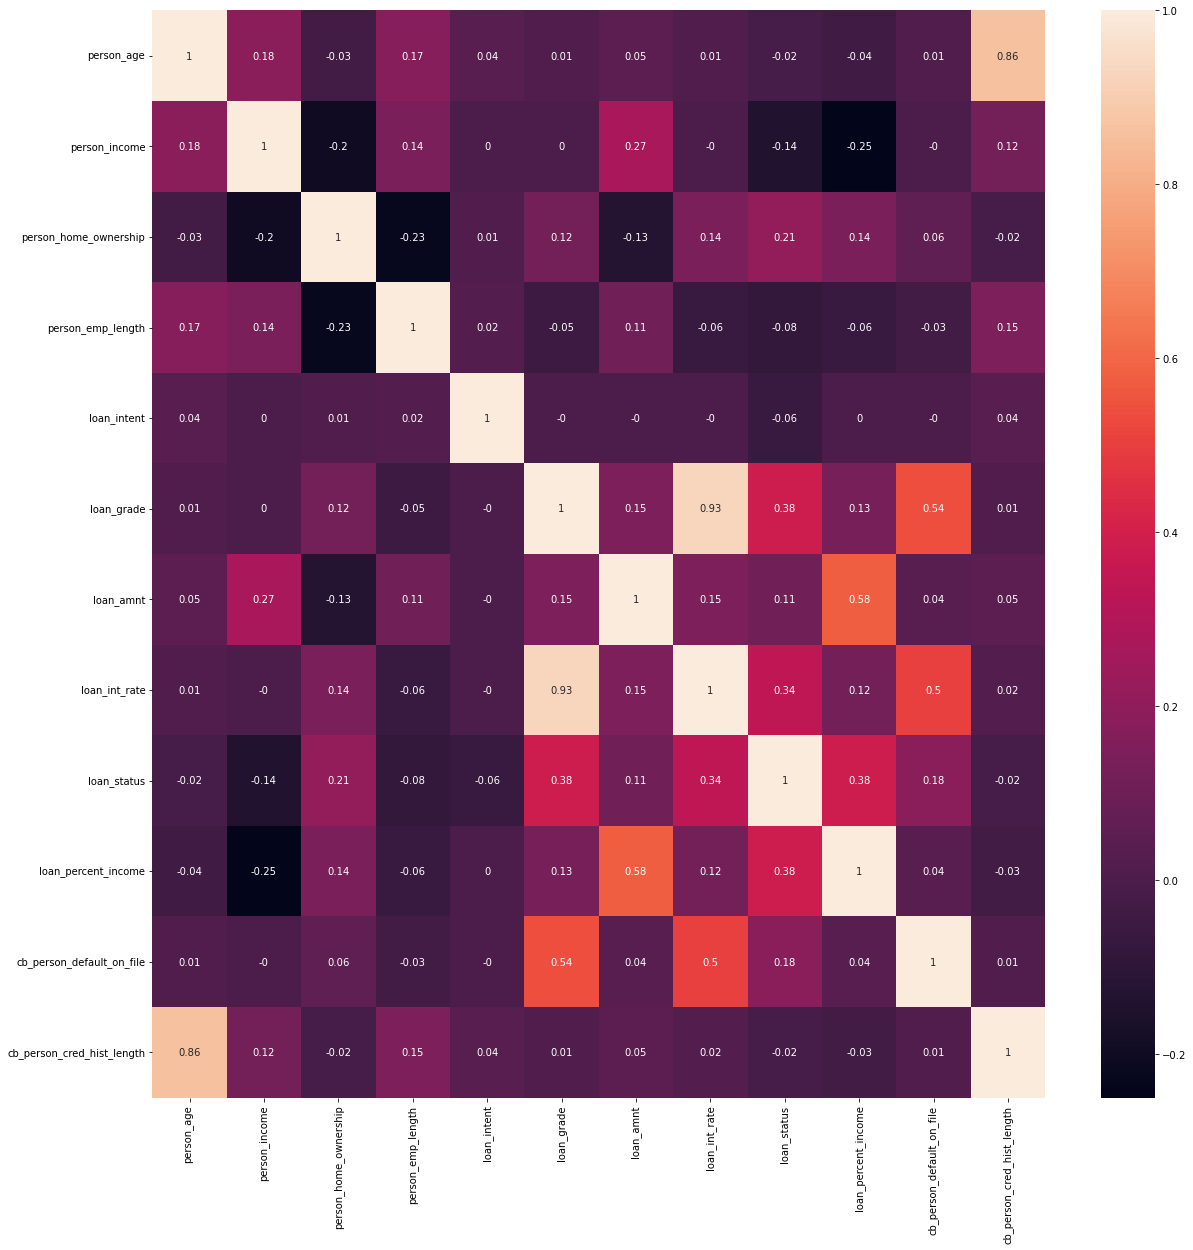

In [12]:
# After encoding it is important to check for collineraity amongst the features
cor = credit_risk.corr().round(2)

plt.figure(figsize=(20,20))
sns.heatmap(cor, xticklabels=cor.columns,annot=True,yticklabels=cor.columns)

In [13]:
credit_risk=credit_risk.drop(['person_age' ],axis=1)

In [14]:
credit_risk.describe()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,6.664937e+04,1.680669,4.788672,2.531322,1.228158,9656.493121,11.039867,0.216600,0.169488,0.178190,5.793736
std,6.235645e+04,1.434497,4.154627,1.729816,1.170746,6329.683361,3.229372,0.411935,0.106393,0.382679,4.038483
min,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,3.948000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,5.595600e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,8.000000e+04,3.000000,7.000000,4.000000,2.000000,12500.000000,13.480000,0.000000,0.230000,0.000000,8.000000
max,6.000000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000


<Figure size 432x288 with 0 Axes>

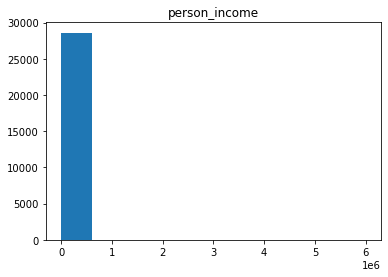

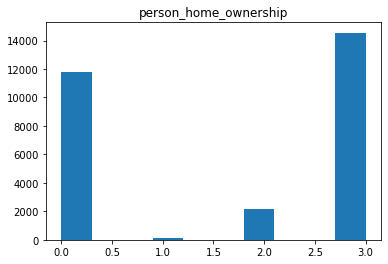

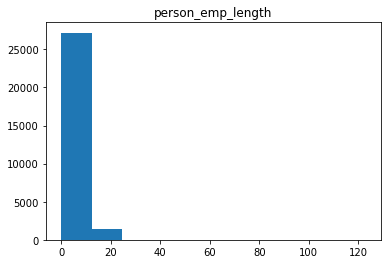

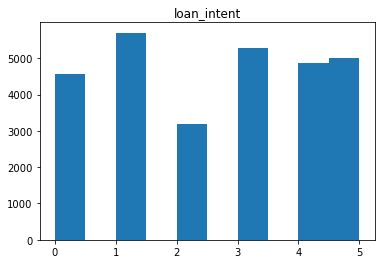

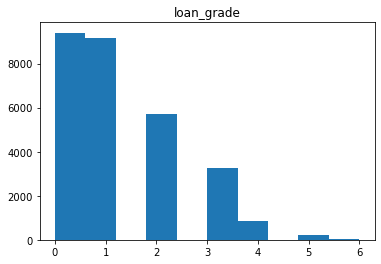

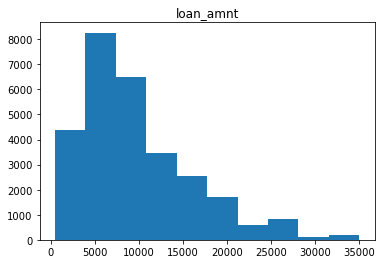

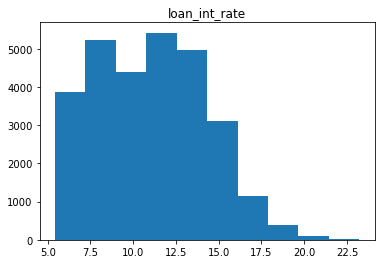

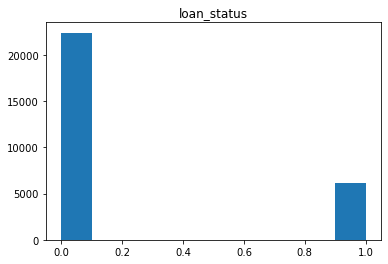

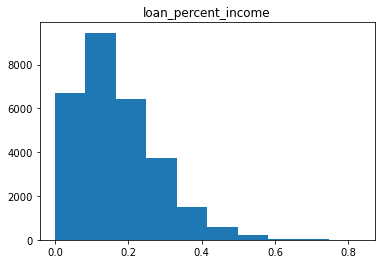

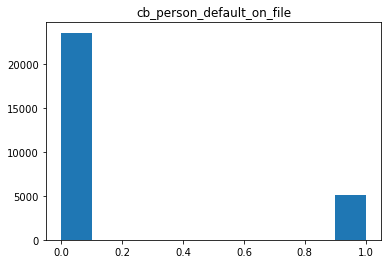

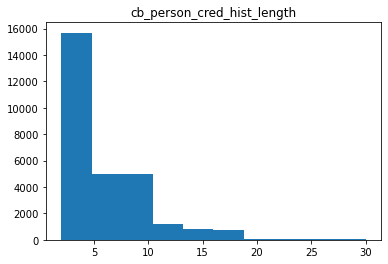

In [17]:
for i,column in enumerate(credit_risk.columns): 
    plt.figure(i)
    credit_risk.hist(column=column,grid=False)

In [18]:
credit_risk_copy =credit_risk.copy()
RC = RobustScaler()
credit_risk_rc=RC.fit_transform(credit_risk_copy)
credit_risk_rc=pd.DataFrame(credit_risk_rc,columns=credit_risk.columns)

In [19]:
X= credit_risk_rc.drop(['loan_status'], axis=1)

y = credit_risk_rc['loan_status']

In [11]:
from sklearn.model_selection import StratifiedKFold

In [20]:
# Set the number of folds you want for cross-validation (usually 5 or 10)
n_splits = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [25]:
# Initialize your classifier (e.g., Logistic Regression)
classifier = LogisticRegression()  # Replace this with your own model

# Perform cross-validation and get the scores
scores = cross_val_score(classifier, X, y, cv=skf)

# Print the scores for each fold
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
#In this code, the cross_val_score function performs stratified k-fold cross-validation and returns the performance scores for each fold. The cv parameter takes the StratifiedKFold object, which takes care of the cross-validation process, including splitting the data into training and testing sets based on class labels.

#This approach is more flexible, as it allows you to use any classifier from scikit-learn and automates the process of cross-validation, making it less error-prone and more convenient.







Cross-validation scores: [0.84375    0.84497207 0.84549581 0.84634189 0.85192946]
Mean cross-validation score: 0.8464978446699112


In [30]:
# Initialize the classifiers
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Perform cross-validation and get the scores for Random Forest
rf_scores = cross_val_score(random_forest, X, y, cv=skf)

# Perform cross-validation and get the scores for Gradient Boosting
gb_scores = cross_val_score(gradient_boosting, X, y, cv=skf)

# Print the scores for each fold
print("Random Forest Cross-validation scores:", rf_scores)
print("Random Forest Mean cross-validation score:", rf_scores.mean())

print("Gradient Boosting Cross-validation scores:", gb_scores)
print("Gradient Boosting Mean cross-validation score:", gb_scores.mean())
#The code above initializes both Random Forest and Gradient Boosting classifiers, performs stratified k-fold cross-validation, and calculates the cross-validation scores for each fold. It then prints the scores and the mean cross-validation score for each algorithm.

#Compare the mean cross-validation scores of both Random Forest and Gradient Boosting to the initial mean cross-validation score of 0.84 that you obtained earlier. If one of the algorithms provides a higher mean cross-validation score, it might be a better choice for your problem. Additionally, you can try tuning hyperparameters for both models to further improve their performance.

#Remember to choose the best-performing model based on cross-validation and evaluate it on a separate test set to get a final estimate of its generalization performance on unseen data. This will help you avoid overfitting to the validation data and provide a more reliable assessment of your model's performance.







Random Forest Cross-validation scores: [0.93505587 0.93191341 0.93278631 0.92963157 0.9301554 ]
Random Forest Mean cross-validation score: 0.9319085121150132
Gradient Boosting Cross-validation scores: [0.92597765 0.92231145 0.9265014  0.92002794 0.9224725 ]
Gradient Boosting Mean cross-validation score: 0.9234581878644039
